In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn
seaborn.set_style("white")
%matplotlib inline

In [3]:
DR41 = pd.read_csv('D:/BUREAU/infos/PROJET_TUTORE_SEMESTRE_2/DR41_DIFF_DATE.txt',low_memory=False)

In [4]:
pd.set_option("display.max_columns",35)

In [5]:
d2 = DR41.copy()

In [21]:
d2.columns

Index(['DATE.REGLT', 'DATE.FACT', 'MONT.FDE', 'DIFF_DATE', 'NOUVEAU',
       'CUBCONS'],
      dtype='object')

In [6]:
d2 = d2[['DIFF_DATE','NOUVEAU','CUBCONS']]

In [7]:
d2.dropna(inplace=True)

In [25]:
d2.isna().sum()

DIFF_DATE    0
NOUVEAU      0
CUBCONS      0
dtype: int64

In [8]:
# Création de l'objet KMeans avec 2 clusters
kmeans = KMeans(n_clusters=4)

# Entraînement du modèle sur les données
kmeans.fit(d2)

# Obtention des centres des clusters
centroids = kmeans.cluster_centers_

# Obtention des étiquettes des clusters pour chaque point de données
labels = kmeans.labels_

C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
print("Centres des clusters:")
print(centroids)

Centres des clusters:
[[5.77922976e+01 1.50920473e-01 3.55069141e+01]
 [3.87415842e+02 1.98019802e-02 4.14964059e+04]
 [3.49306136e+02 9.61617758e-02 4.58718301e+01]
 [2.84498956e+02 6.05427975e-02 4.79589353e+03]]


In [37]:
print(np.unique(labels,return_counts=True))

(array([0, 1, 2, 3]), array([3325103,     101,  174810,     479], dtype=int64))


In [9]:
#association de chaque individu à son groupe

d_clusters = d2.copy()

# Ajouter une nouvelle colonne 'Cluster' au DataFrame
d_clusters['Cluster'] = kmeans.labels_

In [10]:
d_clusters.head()

,DIFF_DATE,NOUVEAU,CUBCONS,Cluster
0,62.0,0,26,0
1,102.0,0,7,0
2,32.0,0,90,0
3,28.0,0,0,0
4,32.0,0,18,0


In [11]:
d_clusters.groupby('Cluster').describe()

DIFF_DATE                                                      \
             count        mean         std    min    25%    50%    75%   
Cluster                                                                  
0        3325103.0   57.783566   33.627024 -977.0   38.0   53.0   62.0   
1            101.0  387.415842   69.809636  217.0  344.0  394.0  450.0   
2            479.0  284.498956  210.249333   21.0   56.0  331.0  424.0   
3         174810.0  349.142046  169.512683  158.0  237.0  298.0  411.0   

                   NOUVEAU                                               \
            max      count      mean       std  min  25%  50%  75%  max   
Cluster                                                                   
0         436.0  3325103.0  0.150920  0.357970  0.0  0.0  0.0  0.0  1.0   
1         537.0      101.0  0.019802  0.140014  0.0  0.0  0.0  0.0  1.0   
2        1435.0      479.0  0.060543  0.238739  0.0  0.0  0.0  0.0  1.0   
3        1629.0   174810.0  0.096242  0.294923  0.0  0.0  0.0  0.0  1.0   

           CUBCONS                                                        \
             count          mean          std      min      25%      50%   
Cluster                                                                    
0        3325103.0     35.508101    61.107304 -36807.0     14.0     27.0   
1            101.0  41496.405941  5037.834696  32510.0  37481.0  41157.0   
2            479.0   4795.893528  2390.901391   2430.0   3325.0   4032.0   
3         174810.0     45.837521   103.984624  -2318.0      6.0     22.0   

                           
             75%      max  
Cluster                    
0           46.0   2416.0  
1        45260.0  51980.0  
2         5343.5  18823.0  
3           47.0   2393.0

### INTERPRETATION DE LA CLASSIFICATION 

D abord le choix de faire un k-means est motivé par d abord nos ressources(machines). Ensuite, du fait de la repartition
des clusters apres plusieurs tentatives. Il a été preferable pour de nous restreindre à 4 groupes. 

On obtient dans le tableau ci-dessus le resumé des variables DIFF-DATE(le nombre de jour qu'à mis l'abonné avant de soldersa facture).
Et les variables NOUVEAU(pour l'anciennete de l'abonne) et CUBCONS(pour quantifier la consommation en m3 d'eau par l'abonné).

Dans le groupe0:
 -C est le groupe le plus representatif. Il contient 3325103 individus soit plus de 95% des observations. En moyenne 
,ils s aquittent de leur facture environ 58 jours apres emission avec un ecart-type de 34jours. 25% paient leur facture dans 
un delai de 38 jours et 75% dans un delai de 62 jours. 
 -Quand à la variable NOUVEAU, il y a 0 les pour abonnés dont l abonnement date de moins de 5ans moins et 1 pour plus.
laplupart des abonnés ont un abonement de moins de 5ans.
 -Pour la variable CUBCONS, la consommation moyenne est de 36m3 avec un ecart type de de 62. et seulement 75% ont une
une consommation de moins de 46.
 -EN RESUME, les individus du groupe0 sont des abonnes de moins de 5ans d'abonnement, avec une consommation qui est en
moyenne 36m3 d'eau et dont la facture est en generale soldée 58 jours apres emission.


Dans les groupe1 et 2:
C est le deuxieme groupe le plus representatif. Il contient  environ 580 individus soit moins de 1% des observations. En moyenne ,ils s aquittent de leur facture plus de 280 jours apres émission. 
 -Pour la variable CUBCONS, la consommation moyenne est assez forte, plus de 4700m3 pour le groupe2 et 41500m3 pour le
groupe1.
 -EN RESUME, les individus des groupe1 et 3 ont les memes caractéristiques. juste que ceux du groupe2 ont une consommation 
plus forte que ceux du groupe2 et Ceux du goupe 1 ont un delai plus long(350) 


Dans le groupe3:
 -C est le second groupe le mieux represente. Il contient 174810 individus soit moins de 5% des observations. En moyenne 
,ils s aquittent de leur facture environ 350 jours apres emission avec un ecart-type de 170jours. 25% paient leur facture dans un delai de 237 jours et 75% dans un delai de 411 jours. 
 -Quand à la variable NOUVEAU, il y a 0 les pour abonnés dont l abonnement date de moins de 5ans moins et 1 pour plus.
laplupart des abonnés ont un abonement de moins de 5ans.
 -Pour la variable CUBCONS, la consommation moyenne est de 46m3 avec un ecart type de de 104. et seulement 75% ont une
une consommation de moins de 47.
 -EN RESUME, les individus du groupe3 ont un comportement similaire à ceux du groupe0 juste qu ils different au niveau du
du delai paiement avec(350 jours)


RESUME-GENERALE:
    les groupes 0 et 3 representent les clients de type PRIVE avec un groupe qui paie ses factures dans un bon delai
    et un autre dans un delai moins bon. Les deux ont des consommations relativement faibles.
    les groupes 1 et 2 representent les clients de type ADMIN. ils ont tous des delais de paiement assez long et de forte
    consommation par rapport aux deux premiers groupes. Mais l un des deux à une consommation beaucoup plus forte que l autre.

### ANALYSE EN COMPOSANTE PRINCIPALE

L Analyse en Composantes Principales (ACP) offre plusieurs avantages, même si vous avez déjà réalisé une matrice
de corrélation pour identifier les variables les plus corrélées à votre variable expliquée. Voici quelques-uns
des avantages de l ACP:

-Réduction de dimension : L ACP permet de réduire la dimension de vos données en projetant-les sur un espace de dimensions
inférieures. Cela peut être particulièrement utile lorsque vous travaillez avec un grand nombre de variables, car cela
vous permet de simplifier et de visualiser vos données de manière plus concise.

-Détection de relations non linéaires : Contrairement à la corrélation linéaire, l ACP peut révéler des relations non linéaires
entre les variables en identifiant les combinaisons linéaires des variables d origine qui expliquent le mieux la variance
totale des données. Ainsi, même si une paire de variables ne présente pas une corrélation linéaire forte, elles peuvent
être liées d une manière non linéaire qui est capturée par les composantes principales.

-Visualisation des clusters : L ACP peut être utilisée pour visualiser vos données dans un espace de dimensions réduit.
En projetant vos données sur les premières composantes principales, vous pouvez visualiser les relations entre les
individus et les clusters dans un plan ou un espace de dimension réduit. Cela peut faciliter l identification de groupes
ou de structures particulières dans vos données.

-Identification des variables importantes : En examinant les contributions des variables aux différentes composantes
principales, vous pouvez identifier les variables qui ont le plus d influence sur la variation des données. 
Cela peut vous aider à sélectionner les variables les plus importantes pour une analyse ultérieure ou pour réduire la 
dimension de votre modèle.

-Traitement des données manquantes : L ACP est également utile pour traiter les données manquantes.
Elle peut fournir une estimation des valeurs manquantes en utilisant les informations disponibles dans les autres
variables, en utilisant les relations découvertes lors de l analyse des composantes principales.

-En résumé, l ACP offre une combinaison de réduction de dimension, de détection de relations non linéaires, de visualisation
et d identification des variables importantes. Elle peut fournir une meilleure compréhension des structures
et des relations cachées dans vos données, même si vous avez déjà effectué une analyse de corrélation.

Faisons l ACP avec le jeu de donnees déja néttoyé qui contient toutes les variables.

In [12]:
chemin="D:/BUREAU/infos/PROJET_TUTORE_SEMESTRE_2/nettoye_DR41.txt"

In [13]:
dn = pd.read_csv(chemin,low_memory=False)

In [14]:
liste = ["CUBCONS", "CUBFAC", "FORFAIT",'INDUST', "SOCIAL", "DOMEST", "NORMAL", "ADMINI", "MONT-SOD", "MONT-TVA", "MONT-FDE", "MONT-FNE", "MONT-ASS-TTC", "MONT-FRAIS-CPT"]

In [15]:
# Supposons que vos données sont stockées dans un DataFrame appelé 'data'
# Sélectionnez les colonnes numériques à inclure dans l'ACP
dn.dropna(inplace=True)
numeric_data = dn[liste]

# Effectuer une ACP
pca = PCA()
pca.fit(numeric_data)

PCA()

bonne explication pour ACP: https://fxjollois.github.io/cours-2019-2020/lp-iot--python-ds/seance2-ACP-classif.html

Variance expliquée:
L objet pca comprend maintenant un certain nombre d objets et de fonctions.
Le premier objet est le tableau des variances expliquées (explained_variance_ - proportionnelles aux valeurs propres)
par chaque dimension, et le ratio (proportion) de variance expliquée par dimension (explained_variance_ratio_).

In [16]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[7.14335009e+08 1.60683242e+07 1.33203926e+06 1.07729973e+06
 1.31034154e+05 2.21290044e+04 1.88532254e+02 1.28236788e+01
 2.92260433e+00 5.37551396e-03 3.81413878e-04 1.06097289e-06
 2.35006968e-24 7.08772185e-25]
[9.74581318e-01 2.19223310e-02 1.81732740e-03 1.46978124e-03
 1.78772476e-04 3.01910365e-05 2.57218266e-07 1.74955975e-08
 3.98736664e-09 7.33391954e-12 5.20370463e-13 1.44750621e-15
 3.20624634e-33 9.66991848e-34]


Bien évidemment, il est possible (et préférable) de faire un tableau récapitulatif, avec les variances expliquées,
les proportions de variance expliquée simples et cumulées. Voici un petit code permettant de faire ceci.

In [17]:
resume = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(14)], # une liste en compr avec 14 elements (variables numeriques)
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
resume

#les differents taux d'inertie.

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,7.143350e+08,97.0,97.0
1,Dim2,1.606832e+07,2.0,100.0
2,Dim3,1.332039e+06,0.0,100.0
3,Dim4,1.077300e+06,0.0,100.0
4,Dim5,1.310342e+05,0.0,100.0
5,Dim6,2.212900e+04,0.0,100.0
6,Dim7,1.885323e+02,0.0,100.0
7,Dim8,1.282368e+01,0.0,100.0
8,Dim9,2.922604e+00,0.0,100.0
9,Dim10,5.375514e-03,0.0,100.0


L idée est de représenter graphiquement ces proportions de variances expliquées (qu on passe en pourcentage par convenance).

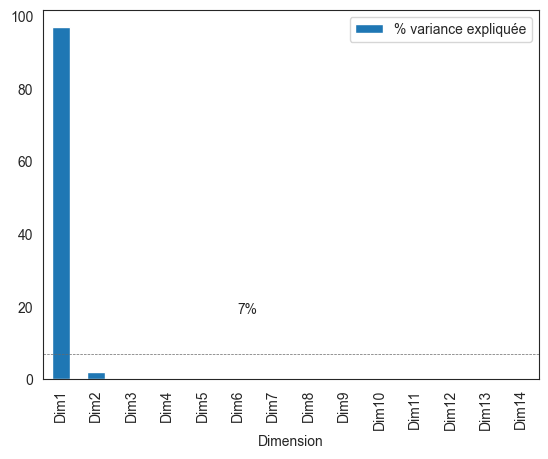

In [24]:
resume.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(5, 18, "7%") # ajout de texte (n'est pas obligatoire de le faire)
plt.axhline(y = 7, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 17 = 100 / 14 (nb dimensions)
plt.show()

On remarque ici que les deux premieres dimensions suffisent à expliquer 99% de la variance des données.

### Représentation des individus

Nous allons maintenant calculer les coordonnées des iris sur les dimensions, avec la fonction transform() de l'objet pca

In [25]:
dn_tr = pca.transform(numeric_data)

Afin de manipuler plus facilement l objet obtenu par la suite, nous allons créer un DataFrame pandas en ne prenant que les deux premières dimensions, ainsi que les espèces.

In [26]:
# Transformation en DataFrame pandas
WGI_pca_df = pd.DataFrame({
    "Dim1" : dn_tr[:,0], 
    "Dim2" : dn_tr[:,1],
    "DR"   :dn["DR"],
    "CEN"  : dn["CEN"],
    "POLICE": dn["POLICE"],
})

# Résultat (premières lignes)
WGI_pca_df.head(20)

,Dim1,Dim2,DR,CEN,POLICE
23,2465.009268,3377.331003,41,140,22031
24,52.889798,1695.691281,41,140,22031
25,-349.690763,1415.939757,41,140,22031
26,-1756.817214,434.925916,41,140,22031
62,1057.659253,2396.635380,41,140,22051
63,-3968.132532,-1106.422353,41,140,22051
64,6888.388595,6459.514380,41,140,22051
66,-5810.780294,-2851.352190,41,140,22052
67,-4973.874242,-1806.535072,41,140,22052
68,-349.690763,1415.939757,41,140,22052


Il est maintenant possible de représenter les données sur le premier plan factoriel. Dans ce graphique, il est important de noter le pourcentage de variance expliquée.

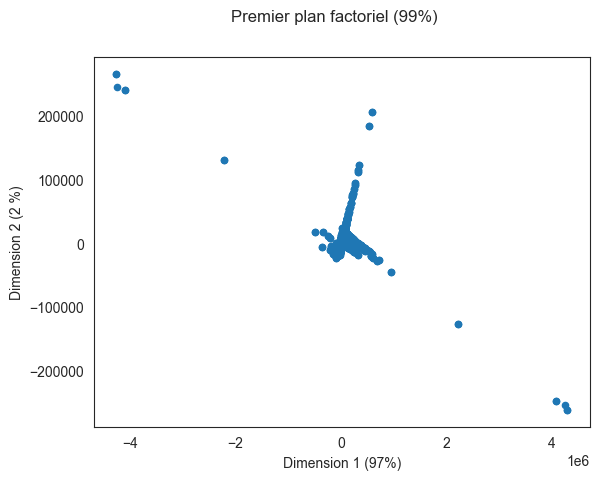

In [27]:
WGI_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (97%)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (2 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (99%)") # titre général
plt.show()

Dans ce même graphique, on veut repérer les individus aux extrêmes. Ci-dessous, nous affichons donc les noms des pays ayant des valeurs absolues élevées pour chaque composante.

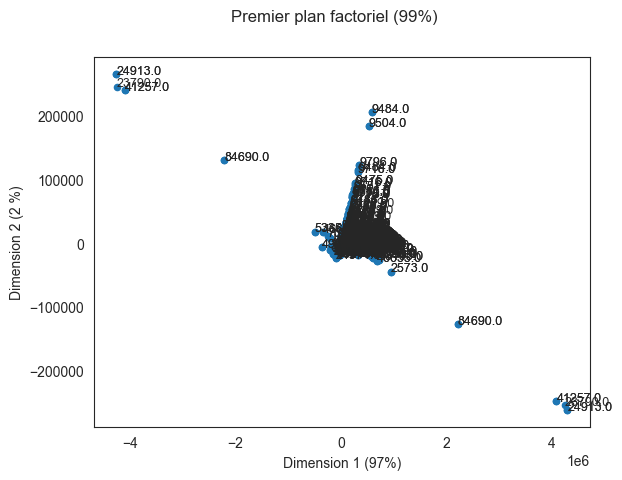

In [28]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots()
WGI_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in WGI_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 2000) | (abs(k[1]['Dim2']) > 2000):
        ax.annotate(k[1]["POLICE"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 9)
plt.xlabel("Dimension 1 (97%)") 
plt.ylabel("Dimension 2 (2 %)")
plt.suptitle("Premier plan factoriel (99%)")
plt.show()

On pourrait aussi se demander s il y a un effet CENTRE. Pour cela, nous allons colorer les points en fonction de leur continent donc.

In [29]:
# permet de créer une palette de couleurs, basée sur Color Brewer
palette = plt.get_cmap("Dark2")
# associe une couleur à chaque continent (cf ci-dessous)
couleurs = dict(zip(WGI_pca_df["CEN"].drop_duplicates(), palette(range(14))))
couleurs

{140: array([0.10588235, 0.61960784, 0.46666667, 1.        ]),
 131: array([0.85098039, 0.37254902, 0.00784314, 1.        ])}

In [30]:
position = dict(zip(couleurs.keys(), range(14)))
position

{140: 0, 131: 1}

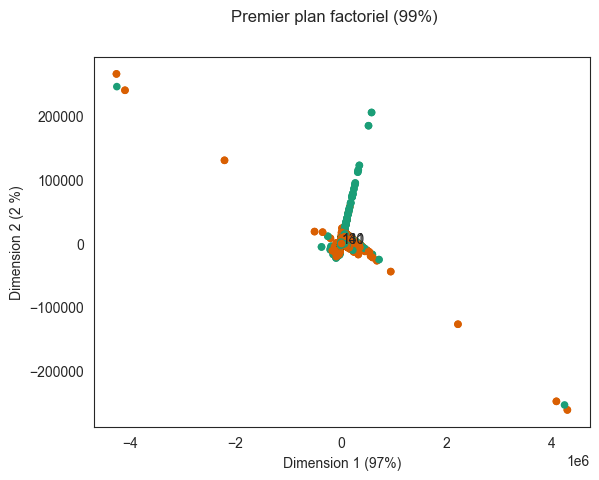

In [31]:
# Affichage des points avec une liste de couleurs
WGI_pca_df.plot.scatter(x = "Dim1", y = "Dim2", c = [couleurs[p] for p in WGI_pca_df["CEN"]])
# boucle pour afficher la légende
for cont, coul in couleurs.items():
    plt.scatter(3, position[cont] / 3 + 2.15, c = [coul], s = 20)
    plt.text(3.2, position[cont] / 3 + 2, cont)
plt.xlabel("Dimension 1 (97%)") 
plt.ylabel("Dimension 2 (2 %)")
plt.suptitle("Premier plan factoriel (99%)")
plt.show()

### Représentation des variables

Lorsqu on réalise une ACP, surtout dans un contexte exploratoire (et non de compression), il est absolument nécessaire 
de décrire les axesà partir des variables, afin de comprendre ce qu ils représentent. Pour cela, nous devons réaliser le cercle des corrélations. Malheureusement, il faut le réaliser à la main.

In [32]:
n = numeric_data.shape[0] # nb individus
p = numeric_data.shape[1] # nb variables
eigval = (n-1) / n * pca.explained_variance_ # valeurs propres
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': numeric_data.columns, 'COR_1': corvar[:,0], 'COR_2': corvar[:,1]})
coordvar

,id,COR_1,COR_2
0,CUBCONS,68.850976,14.730780
1,CUBFAC,68.672358,13.777793
2,FORFAIT,-0.079991,0.182937
3,INDUST,50.488756,-18.440487
4,SOCIAL,0.466018,2.088316
5,DOMEST,6.725134,18.264487
6,NORMAL,9.202094,7.489749
7,ADMINI,1.870348,4.192791
8,MONT-SOD,15657.297606,3141.336760
9,MONT-TVA,2799.740124,471.770161


Une fois ces coordonnées récupérées, on peut donc afficher ce cercle des corrélations comme ci-dessous.

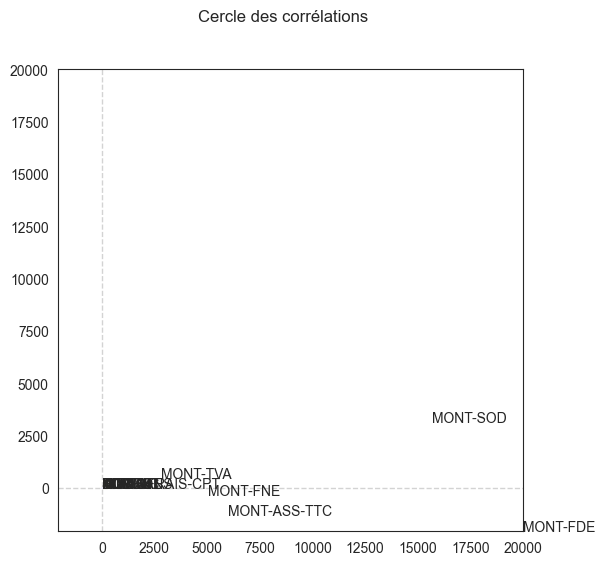

In [33]:
# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-2057.023227, 20010.305634)
axes.set_ylim(-2057.023227, 20010.305634)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.savefig('D:/BUREAU/infos/PROJET_TUTORE_SEMESTRE_2/cercle_corr.png', dpi=300)